In [ ]:
import os, sys, re
import ast
import string
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ="/content/drive/MyDrive/CrosslingualModelPaper2/Copy of BBCNewsTrain.csv"

In [ ]:
df = pd.read_csv(path, sep = ",")
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
classes = df['Category'].unique()

In [ ]:

classes

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [ ]:
# plot entertainment in word cloud

!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from string import punctuation
# from gensim.models import KeyedVectors
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from sklearn.feature_selection import chi2
import chardet
from collections import Counter
import itertools

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from sklearn.metrics import classification_report

In [ ]:
# scikit-sklearn
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score, log_loss, make_scorer, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder,MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# import gensim
# import scikitplot.plotters as skplt

In [ ]:
# deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, concatenate, Dense, Activation, Dropout, Flatten, Embedding, Concatenate, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer,one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, Callback,CSVLogger, ReduceLROnPlateau
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, Callback,CSVLogger
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import SpatialDropout1D
# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 2.11.0


In [ ]:
!pip install -q -U keras-tuner
import kerastuner
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization

In [ ]:

# shuffle data
import random
random_idx_list = [random.randint(1,len(df.Text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,ArticleId,Text,Category
1089,388,roddick into san jose final andy roddick will ...,sport
154,2044,the year search became personal the odds are t...,tech
97,603,pension hitch for long-living men male life ex...,business
573,324,blunkett hints at election call ex-home secret...,politics
690,1965,smith keen on home series return scotland mana...,sport
727,2217,top stars join us tsunami tv show brad pitt r...,entertainment
1124,1799,chepkemei hit by big ban kenya s athletics bod...,sport
753,1106,gazprom in $36m back-tax claim the nuclear u...,business
1438,155,google s toolbar sparks concern search engine ...,tech
149,1184,arthur hailey: king of the bestsellers novelis...,entertainment


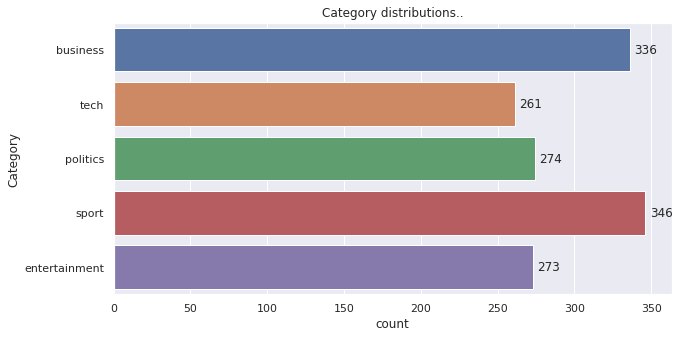

In [ ]:
# sns plot
sns.set(rc={"figure.figsize": (10,5)})
ax = sns.countplot(y="Category",data=df)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.set_title("Category distributions..")
    ax.text(x = width+3,
            y = p.get_y() + (height/2),
            s = "{:.0f}".format(width),
            va = "center")
plt.savefig('Class_dist_Eng.jpeg', format='eps', bbox_inches='tight')

Number of rows per star rating:
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64


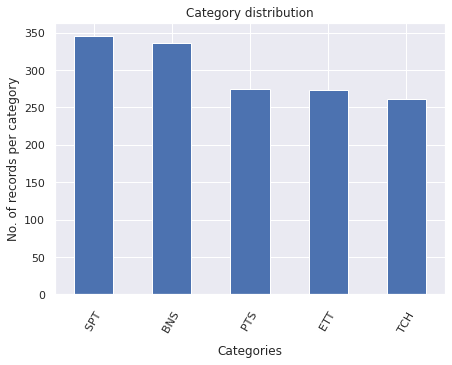

In [ ]:
print("Number of rows per star rating:")
print(df['Category'].value_counts())
plt.figure(figsize=(7, 5))
pd.value_counts(df['Category']).plot.bar(title="Category distribution")
plt.xlabel("Categories")
plt.ylabel("No. of records per category")
plt.xticks(rotation = 60)
plt.xticks([0,1,2,3,4],['  SPT  ', '  BNS  ', '  PTS  ', '  ETT  ', '  TCH  '])
plt.savefig("EngClass75_60dgspace_sp.eps", format = 'eps', dpi= 300, bbox_inches = 'tight')
plt.show()

In [ ]:

stopWords = set(stopwords.words('english'))
import string
def cleanString(text):
#   text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", str(text))

    text = re.sub(r" \n ", " ", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"\'s", " ", text) # remove possessive pronoun terminations:
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"mustn't", "must not", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\= =", " ", text)
    text = re.sub(r"\==", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r'[^\x00-\x7f]+',r' ', text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"\s{2,}", " ", text)

    ## Convert words to lower case and split them
    text = text.lower().split()
    text = [w for w in text if not w in stopWords]

    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    text = [w.translate(table) for w in text]

    # Lemmatizer
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]

    text = " ".join(text)

    return text

In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df.Text = df.Text.apply(lambda x: preprocess(x))

In [ ]:
df['cleantext'] = df['Text'].map(lambda x: cleanString(x))

In [ ]:
ent_data = df.loc[df['Category'] == "entertainment"]

In [ ]:
ent_data.head()

,ArticleId,Text,Category,cleantext
7,1797,french honour director parker british film dir...,entertainment,french honour director parker british film dir...
9,1866,fockers fuel festive film chart comedy meet fo...,entertainment,fockers fuel festive film chart comedy meet fo...
11,1153,housewives lift channel 4 ratings debut us tel...,entertainment,housewife lift channel 4 rating debut u televi...
16,342,u2 desire number one u2 three prestigious gram...,entertainment,u2 desire number one u2 three prestigious gram...
21,177,carry star patsy rowlands dies actress patsy r...,entertainment,carry star patsy rowlands dy actress patsy row...


# Training with 300 embeddings of VecMap

In [ ]:
vectorizer = TextVectorization(max_tokens=50000, output_sequence_length=300)
vectorizer.adapt(df['cleantext'].to_numpy())

In [ ]:
output = vectorizer([["the cat sat on the mat"]])
output.numpy()[0, :6]

array([    1,  5092,  9264,     1,     1, 12156])

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

Path to embeddings


# Cross Emb of 300 dimension created from Fasttext and FastText embeddings


## First embedding with the FFNN model

In [ ]:
# Embeddings with 300 dimension and small vocab from 200d compression
path_to_glove_file300d = '/content/drive/MyDrive/CrosslingualModels/Paper2Embeddings/vecmap_fast_fast300d/'
embeddings_index = {}
with open(path_to_glove_file300d) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

Found 500000 word vectors.


In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 300
hits = 0
misses = 0
input_size = 300
# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 17439 words (4644 misses)


## True

In [ ]:
# embedding_matrix[5:6]

In [ ]:
embedding_layer_word_file200d = Embedding(num_tokens,embedding_dim,
                                 embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                                 trainable=False)

# Feed forward NN

In [ ]:
# !pip install keras-tuner
BATCH_SIZE = 64
num_epochs = 125

In [ ]:
# define cnn model
def build_model(hp):
  model = Sequential()
  int_sequences_input = keras.Input(shape=(300,), dtype="int64") # word embedding shape
  embedding_sequence_file200d = embedding_layer_word_file200d(int_sequences_input)
  # x = SpatialDropout1D(0.2)(embedding_sequence_file200d)
  x = tf.keras.layers.SpatialDropout1D(
      hp.Float('sdropout', 0.1, 0.5, step=0.1, default=0.1))(embedding_sequence_file200d)
  x = Flatten()(x)
  hp_units1 = hp.Int('units1', 8, 16, step=2, default=8)
  # x = Dense(16, activation='relu')(x)
  x = Dense(units=hp_units1, activation='relu')(x)
  # x = Dropout(0.4)(x)
  x = Dropout(hp.Float('dropout',0.1,0.5,step=0.1,default=0.1))(x)
  # compile model
  outputs = Dense(5, activation='softmax')(x)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  opt = Adam(learning_rate=hp_learning_rate)
  model = Model(int_sequences_input, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:

tuner = BayesianOptimization(build_model,objective='val_accuracy',max_trials=5)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
### Categorical data to be converted to numeric data
train_classes = df.Category.tolist()

### Universal list of colors
total_cat =  df['Category'].unique()

### map each color to an integer
mapping = {}
for x in range(len(total_cat)):
  mapping[total_cat[x]] = x

# integer representation
for x in range(len(train_classes)):
  train_classes[x] = mapping[train_classes[x]]

one_hot_encode = to_categorical(train_classes)
# print(one_hot_encode[0:10])

In [ ]:
np.random.seed(42)
shuffle_indices = np.random.permutation(np.arange(len(one_hot_encode)))
x_shuffled = df['Text'][shuffle_indices]
y_shuffled = one_hot_encode[shuffle_indices]
# Split train and test
training_rate = 0.8
train_len = int(len(one_hot_encode) * training_rate)
# train data
x_train = x_shuffled[:train_len]
y_train = y_shuffled[:train_len]
# test data
x_test = x_shuffled[train_len:]
y_test = y_shuffled[train_len:]

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1192,)
y_train shape: (1192, 5)
x_test shape: (298,)
y_test shape: (298, 5)


In [ ]:
x_trainvec = vectorizer(np.array([[s] for s in x_train])).numpy()
x_valvec = vectorizer(np.array([[s] for s in x_test])).numpy()

In [ ]:
tuner.search(x_trainvec, y_train,batch_size=BATCH_SIZE,
             epochs=num_epochs,
             validation_data=(x_valvec, y_test))

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
sdropout: 0.1
units1: 16
dropout: 0.1
learning_rate: 0.01
Score: 0.8691275119781494
Trial summary
Hyperparameters:
sdropout: 0.30000000000000004
units1: 16
dropout: 0.2
learning_rate: 0.001
Score: 0.8657718300819397
Trial summary
Hyperparameters:
sdropout: 0.30000000000000004
units1: 12
dropout: 0.2
learning_rate: 0.01
Score: 0.8389261960983276
Trial summary
Hyperparameters:
sdropout: 0.30000000000000004
units1: 10
dropout: 0.2
learning_rate: 0.01
Score: 0.8221476674079895
Trial summary
Hyperparameters:
sdropout: 0.5
units1: 16
dropout: 0.5
learning_rate: 0.0001
Score: 0.8053691387176514


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
print(best_hps.values)

{'sdropout': 0.1, 'units1': 16, 'dropout': 0.1, 'learning_rate': 0.01}


In [ ]:
# model svaing
filepath = '/content/drive/MyDrive/CrosslingualModels/Paper2Results/vecmap/'
# saving fitting accuracy and others
csv_logger = CSVLogger(filepath+'CrosslingualModel_FandFVec300d.csv', append=True, separator=';')
check_point = ModelCheckpoint(filepath+'CrosslingualModel_FandFVec300d.h5', save_best_only=True, save_weights_only=True)
calls = [csv_logger,check_point]

In [ ]:
# #

# # define cnn model
# def create_model():
#   model = Sequential()
#   int_sequences_input = keras.Input(shape=(300,), dtype="int64") # word embedding shape
#   embedding_sequence_file200d = embedding_layer_word_file200d(int_sequences_input)
#   x = SpatialDropout1D(0.1)(embedding_sequence_file200d)
#   x = Flatten()(x)
#   # hp_units1 = hp.Int('units1', 8, 16, step=2, default=4)
#   x = Dense(16, activation='relu')(x)
#   # x = Dense(units=hp_units1, activation='relu')(x)
#   x = Dropout(0.1)(x)
#   # x = Dropout(hp.Float('dropout',0.1,0.5,step=0.1,default=0.1))(x)
#   # compile model
#   outputs = Dense(5, activation='softmax')(x)
#   hp_learning_rate = 0.01
#   opt = Adam(learning_rate=hp_learning_rate)
#   model = Model(int_sequences_input, outputs)
#   model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#   return model

# # Create a basic model instance
# model = create_model()

# # Display the model's architecture
# model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 300)          6625500   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 300)         0         
 ropout1D)                                                       
                                                                 
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense (Dense)               (None, 16)                1440016   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                             

In [ ]:
model = tuner.hypermodel.build(best_hps)
historyTrue = model.fit(x_trainvec, y_train,
                      epochs=num_epochs,batch_size=BATCH_SIZE,
                      validation_data=(x_valvec, y_test),
                      callbacks= calls)

Epoch 1/125
19/19 [==============================] - 3s 20ms/step - loss: 1.2207 - accuracy: 0.5109 - val_loss: 0.6730 - val_accuracy: 0.7517
Epoch 2/125
19/19 [==============================] - 0s 11ms/step - loss: 0.3570 - accuracy: 0.8742 - val_loss: 0.4633 - val_accuracy: 0.8490
Epoch 3/125
19/19 [==============================] - 0s 10ms/step - loss: 0.1710 - accuracy: 0.9253 - val_loss: 0.4465 - val_accuracy: 0.8456
Epoch 4/125
19/19 [==============================] - 0s 11ms/step - loss: 0.1166 - accuracy: 0.9539 - val_loss: 0.3908 - val_accuracy: 0.8523
Epoch 5/125
19/19 [==============================] - 0s 11ms/step - loss: 0.1240 - accuracy: 0.9421 - val_loss: 0.3845 - val_accuracy: 0.8591
Epoch 6/125
19/19 [==============================] - 0s 6ms/step - loss: 0.0842 - accuracy: 0.9639 - val_loss: 0.4451 - val_accuracy: 0.8523
Epoch 7/125
19/19 [==============================] - 0s 6ms/step - loss: 0.0811 - accuracy: 0.9757 - val_loss: 0.4657 - val_accuracy: 0.8490
Epoch 8/

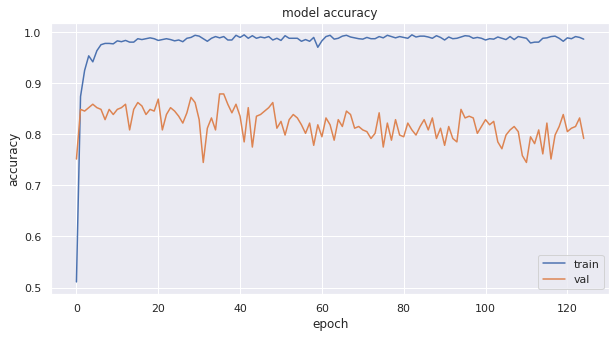

In [ ]:
# 125 epochs, 16 neurons, 1 layer, 0.4 dropout
from matplotlib import pyplot as plt
plt.plot(historyTrue.history['accuracy'])
plt.plot(historyTrue.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig(filepath+"FFNNaccuracyFandFVec300d.png", format = 'png', dpi = 300, bbox_inches='tight')
plt.show()


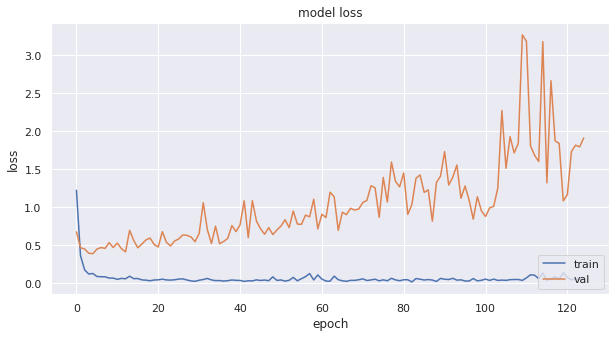

In [ ]:
# 125 epochs, 16 neurons, 1 layer, 0.4 dropout
from matplotlib import pyplot as plt
plt.plot(historyTrue.history['loss'])
plt.plot(historyTrue.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig(filepath+"FFNNlossFandFVec300d.png", format = 'png', dpi = 150, bbox_inches='tight')
plt.show()

## ROC AUC Curve

In [ ]:
import itertools
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [ ]:
y_score = model.predict(x_valvec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


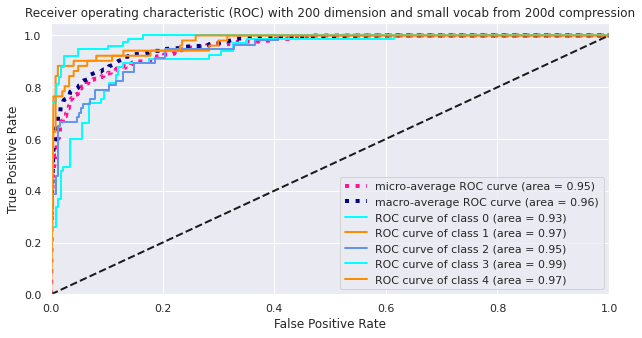

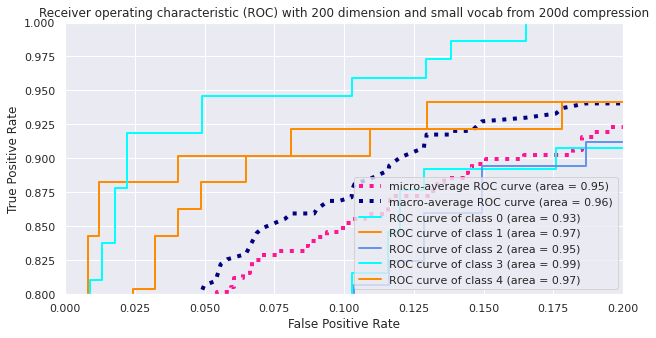

In [ ]:
lw = 2
num_of_class = 5
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_of_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_of_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_of_class):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_of_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_of_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) with 200 dimension and small vocab from 200d compression')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_of_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) with 200 dimension and small vocab from 200d compression')
plt.legend(loc="lower right")
plt.savefig(filepath+'CrosslingualModel_FandFVec300d.png',transparent=False, bbox_inches='tight',dpi=300)
plt.show()

## CCA of dimension 300 from glove and fasttext embeddings model




In [ ]:
vectorizer = TextVectorization(max_tokens=50000, output_sequence_length=300)
# text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer.adapt(df['cleantext'].to_numpy())

In [ ]:
output = vectorizer([["the cat sat on the mat"]])
output.numpy()[0, :6]

voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
# Embeddings with 111 dimension from small vocab and 640 compression
path_to_glove_file111d = '/content/drive/MyDrive/CrosslingualModels/Paper2Embeddings/vecmap_glove_fast300/'
embeddings_index = {}
with open(path_to_glove_file111d) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 300
hits = 0
misses = 0
input_size = 300
# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 0 words (22083 misses)


In [ ]:
# embedding_matrix[5:6]

In [ ]:
embedding_layer_word11d = Embedding(num_tokens,embedding_dim,
                                 embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                                 trainable=False)


# Feed forward NN with 300 dimension

In [ ]:
# !pip install keras-tuner
BATCH_SIZE = 64
num_epochs = 125

In [ ]:
def build_model_111D(hp):
  model = Sequential()
  int_sequences_input = keras.Input(shape=(300,), dtype="int64") # word embedding shape
  embedding_sequence_file111d = embedding_layer_word11d(int_sequences_input)
  x = tf.keras.layers.SpatialDropout1D(
      hp.Float('sdropout', 0.1, 0.5, step=0.1, default=0.1))(embedding_sequence_file111d)
  x = Flatten()(x)
  hp_units1 = hp.Int('units1', 8, 16, step=2, default=4)
  # x = Dense(16, activation='relu')(x)
  x = Dense(units=hp_units1, activation='relu')(x)
  # x = Dropout(0.4)(x)
  x = Dropout(hp.Float('dropout',0.1,0.5,step=0.1,default=0.1))(x)
  # compile model
  outputs = Dense(5, activation='softmax')(x)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  opt = Adam(learning_rate=hp_learning_rate)
  model = Model(int_sequences_input, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
tuner_model_111D = BayesianOptimization(build_model_111D,objective='val_accuracy',max_trials=4)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
### Categorical data to be converted to numeric data
train_classes = df.Category.tolist()

### Universal list of colors
total_cat =  df['Category'].unique()

### map each color to an integer
mapping = {}
for x in range(len(total_cat)):
  mapping[total_cat[x]] = x

# integer representation
for x in range(len(train_classes)):
  train_classes[x] = mapping[train_classes[x]]

one_hot_encode = to_categorical(train_classes)
# print(one_hot_encode[0:10])

In [ ]:
np.random.seed(42)
shuffle_indices = np.random.permutation(np.arange(len(one_hot_encode)))
x_shuffled = df['Text'][shuffle_indices]
y_shuffled = one_hot_encode[shuffle_indices]

# Split train and test
training_rate = 0.8
train_len = int(len(one_hot_encode) * training_rate)

# train data
x_train = x_shuffled[:train_len]
y_train = y_shuffled[:train_len]

# test data
x_test = x_shuffled[train_len:]
y_test = y_shuffled[train_len:]

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
x_trainvec2 = vectorizer(np.array([[s] for s in x_train])).numpy()
x_valvec2 = vectorizer(np.array([[s] for s in x_test])).numpy()

In [ ]:
tuner_model_111D.search(x_trainvec2, y_train,
                        batch_size=BATCH_SIZE,epochs=num_epochs,
                        validation_data=(x_valvec2, y_test))

In [ ]:
tuner_model_111D.results_summary()

In [ ]:
# Get the optimal hyperparameters --Test
best_model_111D = tuner_model_111D.get_best_hyperparameters(num_trials = 1)[0]
print(best_model_111D.values)

In [ ]:
# Get the optimal hyperparameters --Test
best_model_111D = tuner_model_111D.get_best_hyperparameters(num_trials = 1)[0]
print(best_model_111D.values)

# {'sdropout': 0.1, 'units1': 16, 'dropout': 0.5, 'learning_rate': 0.0001}

In [ ]:
# model svaing
filepath = '/content/drive/MyDrive/CrosslingualModels/Paper2Results/vecmap/'
# saving fitting accuracy and others
csv_logger = CSVLogger(filepath+'Crosslingual_GandFVec300d.csv', append=True, separator=';')
check_point = ModelCheckpoint(filepath+'Crosslingual_GandFVec300d.h5', save_best_only=True, save_weights_only=True)
calls = [csv_logger,check_point]

In [ ]:
#
# define cnn model
def create_model():
  model = Sequential()
  int_sequences_input = keras.Input(shape=(300,), dtype="int64") # word embedding shape
  embedding_sequence_file200d = embedding_layer_word11d(int_sequences_input)
  x = SpatialDropout1D(0.1)(embedding_sequence_file200d)
  x = Flatten()(x)
  # hp_units1 = hp.Int('units1', 8, 16, step=2, default=4)
  x = Dense(16, activation='relu')(x)
  # x = Dense(units=hp_units1, activation='relu')(x)
  x = Dropout(0.5)(x)
  # x = Dropout(hp.Float('dropout',0.1,0.5,step=0.1,default=0.1))(x)
  # compile model
  outputs = Dense(5, activation='softmax')(x)
  hp_learning_rate = 0.0001
  opt = Adam(learning_rate=hp_learning_rate)
  model = Model(int_sequences_input, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

In [ ]:
# model_111D = tuner_model_111D.hypermodel.build(best_model_111D)
history_model_111D = model.fit(x_trainvec2, y_train,
                      epochs=num_epochs,batch_size=BATCH_SIZE,
                      validation_data=(x_valvec2, y_test), callbacks=calls)

In [ ]:
# 125 epochs, 16 neurons, 1 layer, 0.4 dropout
from matplotlib import pyplot as plt
plt.plot(history_model_111D.history['accuracy'])
plt.plot(history_model_111D.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig(filepath+"FFNNaccuracy_GandFVec300d.png", format = 'png', dpi = 150, bbox_inches='tight')
plt.show()

In [ ]:
# 125 epochs, 16 neurons, 1 layer, 0.4 dropout
from matplotlib import pyplot as plt
plt.plot(history_model_111D.history['loss'])
plt.plot(history_model_111D.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig(filepath+"FFNNloss_GandFVec300d.png", format = 'png', dpi = 150, bbox_inches='tight')
plt.show()

In [ ]:
import itertools
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [ ]:
y_score2 = model.predict(x_valvec2)

In [ ]:
lw = 2
num_of_class = 5
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_of_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_of_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_of_class):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_of_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_of_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) with 111 dimension from small vocab and 640 compression')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_of_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) with 300 dimension from cca with glove source')
plt.legend(loc="lower right")
plt.savefig(filepath+'Crosslingual_GandFVec300d.png',transparent=False, bbox_inches='tight',dpi=300)
plt.show()

# VecMap embedding of dimension 200 from glove and fasttext





## Embeddings with 200 dimension

In [ ]:
vectorizer = TextVectorization(max_tokens=50000, output_sequence_length=200)
# text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer.adapt(df['cleantext'].to_numpy())

In [ ]:
output = vectorizer([["the cat sat on the mat"]])
output.numpy()[0, :6]

array([    1,  5092,  9264,     1,     1, 12156])

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
# Embeddings with 200 dimension and small vocab from 200d compression
path_to_glove_file194d = '/content/drive/MyDrive/CrosslingualModelPaper2/Paper2Embeddings/VecMap_glove_fast_200d_UCEC/src_G_F_uns_sl_n_UCEC.txt'

embeddings_index = {}
with open(path_to_glove_file194d) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

Found 400001 word vectors.


In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 200
hits = 0
misses = 0
input_size = 200
# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 21018 words (1065 misses)


# Training with non-tunable embeddings of 200 d




In [ ]:
embedding_layer_word = Embedding(num_tokens,embedding_dim,
                                 embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                                 trainable=False)


In [ ]:
# !pip install keras-tuner
BATCH_SIZE = 64
num_epochs = 125

In [ ]:
# define cnn model
def build_model(hp):
  model = Sequential()
  int_sequences_input = keras.Input(shape=(200,), dtype="int64") # word embedding shape
  embedding_sequences = embedding_layer_word(int_sequences_input)
  # x = SpatialDropout1D(0.2)(embedding_sequences)
  x = tf.keras.layers.SpatialDropout1D(
      hp.Float('SDropout', 0, 0.4, step=0.1, default=0.1))(embedding_sequences)
  x = Flatten()(x)
  hp_units1 = hp.Int('units1', 8, 16, step=2, default=8)
  # x = Dense(16, activation='relu')(x)
  x = Dense(units=hp_units1, activation='relu')(x)
  # x = Dropout(0.5)(x)
  x = tf.keras.layers.Dropout(
      hp.Float('dropout', 0, 0.4, step=0.1, default=0.1))(x)
  # compile model
  outputs = Dense(5, activation='softmax')(x)
  # optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, , sampling='log'))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  optimizer = Adam(learning_rate=hp_learning_rate)
  model = Model(int_sequences_input, outputs)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:

tuner = BayesianOptimization(build_model,objective='val_accuracy',max_trials=5)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
### Categorical data to be converted to numeric data
train_classes = df.Category.tolist()

### Universal list of colors
total_cat =  df['Category'].unique()

### map each color to an integer
mapping = {}
for x in range(len(total_cat)):
  mapping[total_cat[x]] = x

# integer representation
for x in range(len(train_classes)):
  train_classes[x] = mapping[train_classes[x]]

one_hot_encode = to_categorical(train_classes)
# print(one_hot_encode[0:10])

In [ ]:
np.random.seed(42)
shuffle_indices = np.random.permutation(np.arange(len(one_hot_encode)))
x_shuffled = df['Text'][shuffle_indices]
y_shuffled = one_hot_encode[shuffle_indices]

# Split train and test
training_rate = 0.8
train_len = int(len(one_hot_encode) * training_rate)

# train data
x_train = x_shuffled[:train_len]
y_train = y_shuffled[:train_len]

# test data
x_test = x_shuffled[train_len:]
y_test = y_shuffled[train_len:]

In [ ]:

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1192,)
y_train shape: (1192, 5)
x_test shape: (298,)
y_test shape: (298, 5)


In [ ]:
x_trainvec = vectorizer(np.array([[s] for s in x_train])).numpy()
x_valvec = vectorizer(np.array([[s] for s in x_test])).numpy()

In [ ]:
tuner.search(x_trainvec, y_train,batch_size=BATCH_SIZE,
             epochs=num_epochs,
             validation_data=(x_valvec, y_test))

Trial 5 Complete [00h 00m 14s]
val_accuracy: 0.963087260723114

Best val_accuracy So Far: 0.963087260723114
Total elapsed time: 00h 01m 30s


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
SDropout: 0.0
units1: 14
dropout: 0.30000000000000004
learning_rate: 0.0001
Score: 0.9597315192222595
Trial summary
Hyperparameters:
SDropout: 0.0
units1: 10
dropout: 0.0
learning_rate: 0.0001
Score: 0.9530201554298401
Trial summary
Hyperparameters:
SDropout: 0.30000000000000004
units1: 16
dropout: 0.2
learning_rate: 0.0001
Score: 0.9496644139289856
Trial summary
Hyperparameters:
SDropout: 0.0
units1: 8
dropout: 0.4
learning_rate: 0.01
Score: 0.9496644139289856
Trial summary
Hyperparameters:
SDropout: 0.0
units1: 16
dropout: 0.4
learning_rate: 0.0001
Score: 0.9496644139289856


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
print(best_hps.values)

{'SDropout': 0.4, 'units1': 14, 'dropout': 0.0, 'learning_rate': 0.01}


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
print(best_hps.values)

{'SDropout': 0.30000000000000004, 'units1': 10, 'dropout': 0.1, 'learning_rate': 0.0001}


# {'SDropout': 0.30000000000000004, 'units1': 10, 'dropout': 0.1, 'learning_rate': 0.0001}

---



# {'SDropout': 0.0, 'units1': 16, 'dropout': 0.4, 'learning_rate': 0.01} --unsupervised learning

# prams UCEUdim emd
{'SDropout': 0.2, 'units1': 10, 'dropout': 0.30000000000000004, 'learning_rate': 0.001}

# params UCEU embeddings
*{'SDropout': 0.0, 'units1': 14, 'dropout': 0.1, 'learning_rate': 0.01}*

# 54 accuracy model params
# {'SDropout': 0.2, 'units1': 8, 'dropout': 0.1, 'learning_rate': 0.01}





In [ ]:
# model svaing
filepath = '/content/drive/MyDrive/CrosslingualModelPaper2/Results/glove_fast200dSemi/'
# saving fitting accuracy and others
csv_logger = CSVLogger(filepath+'CrosslingualModel_GandFVec200d1Hyp1.csv', append=True, separator=';')
check_point = ModelCheckpoint(filepath+'CrosslingualModel_GandFVec200d1Hyp1.h5', save_best_only=True, save_weights_only=True)
calls = [csv_logger,check_point]

In [ ]:
# define cnn model
def create_model():
  model = Sequential()
  int_sequences_input = keras.Input(shape=(200,), dtype="int64") # word embedding shape
  embedding_sequence_file200d = embedding_layer_word(int_sequences_input)
  x = SpatialDropout1D(0.1)(embedding_sequence_file200d)
  x = Flatten()(x)
  # hp_units1 = hp.Int('units1', 8, 16, step=2, default=4)
  x = Dense(16, activation='relu')(x)
  # x = Dense(units=hp_units1, activation='relu')(x)
  x = Dropout(0.4)(x)
  # x = Dropout(hp.Float('dropout',0.1,0.5,step=0.1,default=0.1))(x)
  # compile model
  outputs = Dense(5, activation='softmax')(x)
  hp_learning_rate = 0.01
  opt = Adam(learning_rate=hp_learning_rate)
  model = Model(int_sequences_input, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 200)          4417000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 200)         0         
 lDropout1D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 40000)             0         
                                                                 
 dense_2 (Dense)             (None, 16)                640016    
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                           

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_trainvec, y_train,
                      epochs=num_epochs,batch_size=BATCH_SIZE,
                      validation_data=(x_valvec, y_test),
                      callbacks= calls)


Epoch 1/125
19/19 [==============================] - 1s 26ms/step - loss: 0.8301 - accuracy: 0.6871 - val_loss: 0.3111 - val_accuracy: 0.9027
Epoch 2/125
19/19 [==============================] - 0s 12ms/step - loss: 0.1312 - accuracy: 0.9648 - val_loss: 0.2297 - val_accuracy: 0.9329
Epoch 3/125
19/19 [==============================] - 0s 19ms/step - loss: 0.0325 - accuracy: 0.9941 - val_loss: 0.2073 - val_accuracy: 0.9362
Epoch 4/125
19/19 [==============================] - 0s 13ms/step - loss: 0.0199 - accuracy: 0.9975 - val_loss: 0.2155 - val_accuracy: 0.9430
Epoch 5/125
19/19 [==============================] - 0s 13ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1975 - val_accuracy: 0.9362
Epoch 6/125
19/19 [==============================] - 0s 8ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.2012 - val_accuracy: 0.9362
Epoch 7/125
19/19 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.9983 - val_loss: 0.2107 - val_accuracy: 0.9463
Epoch 8/

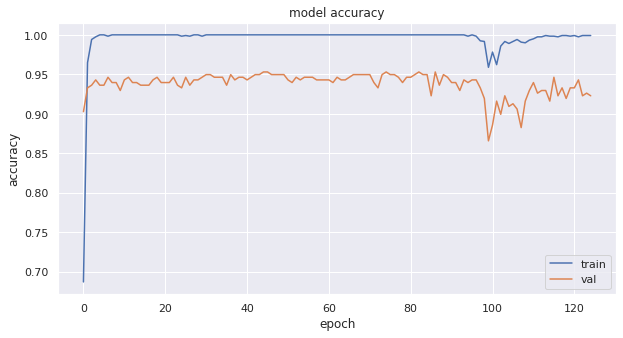

In [ ]:
# 125 epochs, 16 neurons, 1 layer, 0.4 dropout
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig(filepath+"FFNNaccuracy_GandFVec200d1Hyp1.png", format = 'png', dpi = 300, bbox_inches='tight')
plt.show()

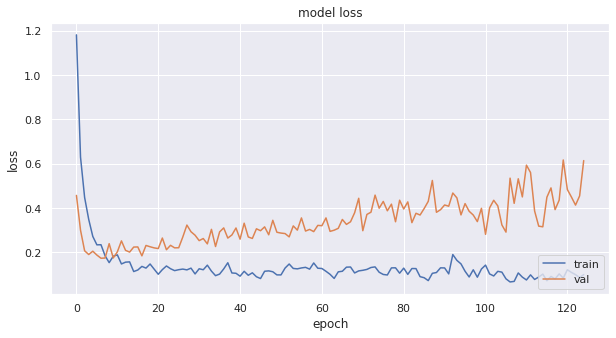

In [ ]:
# 125 epochs, 16 neurons, 1 layer, 0.4 dropout
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig(filepath+"FFNNloss_GandFVec200d1Hyp1.png", format = 'png', dpi = 150, bbox_inches='tight')
plt.show()

## ROC AUC Curve

In [ ]:
import itertools
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [ ]:
y_score = model.predict(x_valvec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


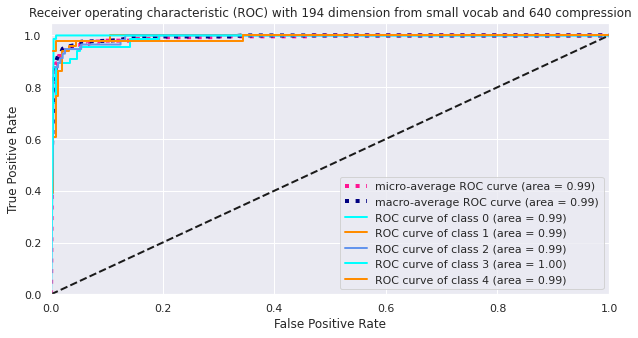

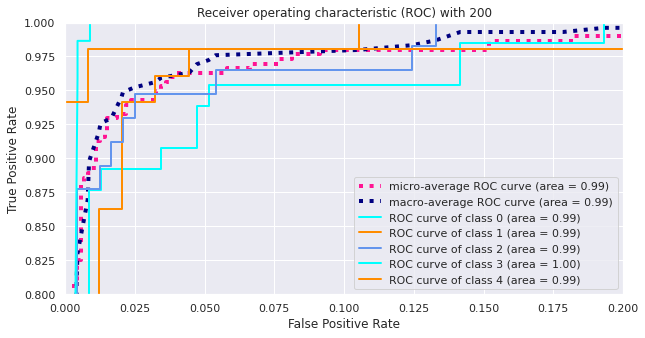

In [ ]:
lw = 2
num_of_class = 5
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_of_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_of_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_of_class):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_of_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_of_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) with 194 dimension from small vocab and 640 compression')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_of_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) with 200')
plt.legend(loc="lower right")
plt.savefig(filepath+'CrosslingualModel_GandFVec200d1Hyp1.png',transparent=False, bbox_inches='tight',dpi=300)
plt.show()

## All the graphs Trainable True

In [ ]:
plot_path = '/content/drive/MyDrive/CrosslingualModels/Paper2Results/vecmap/'
fast_fast300CCA = pd.read_csv(plot_path + 'CrosslingualModel_FstandFast300SETTest1.csv',sep=';', index_col=0)
glove_fast300CCA = pd.read_csv(plot_path + 'Crosslingual_glove_fast300SETCCATest.csv',sep=';', index_col=0)
glove_fast200CCA = pd.read_csv(plot_path + 'CrosslingualModel_glove_fastE200CCATest.csv',sep=';', index_col=0)
fast_fast300Vecmap = pd.read_csv(plot_path + 'CrosslingualModel_fast_fastVM300d.csv',sep=';', index_col=0)
glove_fast200Vecmap = pd.read_csv(plot_path + 'CrosslingualModel_glove_fast200VM.csv',sep=';', index_col=0)
glove_fast300VecMap = pd.read_csv(plot_path + 'CrosslingualModel_glove_fastE300d.csv',sep=';', index_col=0)

In [ ]:
plt.plot(fast_fast300CCA.index, fast_fast300CCA['val_accuracy'],  color='blue', label= 'FasText and FastText, d = 300, model = CCA',linewidth=1)
plt.plot( glove_fast300CCA.index,  glove_fast300CCA['val_accuracy'], color='red', label= 'Glove and FastText, d = 300, model = CCA',linewidth=1)
plt.plot(glove_fast200CCA.index, glove_fast200CCA['val_accuracy'],  color='aqua', label= 'Glove and FastText, d = 200, model = CCA',linewidth=1)
plt.plot(fast_fast300Vecmap.index, fast_fast300Vecmap['val_accuracy'],  color='darkorange', label= 'FasText and FastText, d = 300, model = VM',linewidth=1)
plt.plot(glove_fast300VecMapIloc.index, glove_fast300VecMapIloc['val_accuracy'],  color='black', label= 'Glove and FastText, d = 300, model = VM',linewidth=1)
plt.plot(glove_fast200Vecmap.index, glove_fast200Vecmap['val_accuracy'],  color='purple', label= 'Glove and FastText, d = 200, model = VM',linewidth=1)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Val_accuracy')
plt.title('Validation accuracy for VecMap and CCA embeddings for Setswana South African language')
plt.savefig(plot_path+'all_embeddingsTest.png', dpi=300)

# Crosslingual Transfer on News Headlines: Zero Shot.

In [ ]:
# from keras.models import load_model
# loaded_model = load_model('/content/CrosslingualMode90p.h5')
import pandas as pd

In [ ]:
testdf = pd.read_excel('/content/drive/MyDrive/CrosslingualModelPaper2/daily-news-full-latest.xlsx')

In [ ]:
testdf.head()

,Unnamed: 0,title,content,url,content_word_count,content_character_count,label,sub-label
0,5827,Mogokgo o lela ka tlhaelo ya matlo a borutelo,Mogokgo wa sekolo se sebotlana sa Takatokwane ...,http://www.dailynews.gov.bw/news-details.php?n...,498,2558.0,education,NaN
1,3657,Masunga o akotse boipuso,Go lebega banni ba Masunga ba ne ba nyoretswe...,http://www.dailynews.gov.bw/news-details.php?n...,486,2506.0,politics,NaN
2,2243,Tsamaya ka pula Tautona Khama - Palapye,E rile e tsena tshetlha ya dikgwa ya ga Mmangw...,http://www.dailynews.gov.bw/news-details.php?n...,536,2722.0,society,politics
3,6889,Maitseo namane ya moroba,Ditlhopha tsa moopelo wa dinnoto le tsa metlae...,http://www.dailynews.gov.bw/news-details.php?n...,296,1638.0,"arts,culture,entertainment and media",NaN
4,3133,Morogo wa lephutshe o na le dikotla,"Bontsi jwa batho ba rata merogo ya rothwe, mor...",http://www.dailynews.gov.bw/news-details.php?n...,295,1487.0,health,education


In [ ]:

testdf_wcols = testdf.drop(['Unnamed: 0', 'title', 'url', 'content_word_count', 'content_character_count', 'sub-label' ], axis=1)

In [ ]:
# drop Nan
testdf_wcolsNanRemoved = testdf_wcols.dropna()

In [ ]:
testdf_wcolNoedu = testdf_wcolsNanRemoved[testdf_wcolsNanRemoved['label'] != 'education']


In [ ]:

testdf_wcolNohelt = testdf_wcolNoedu[testdf_wcolNoedu['label'] != 'health']

In [ ]:
testdf_wcolNoenv= testdf_wcolNohelt[testdf_wcolNohelt['label'] != 'environment']

In [ ]:
testdf_wcolNolab = testdf_wcolNoenv[testdf_wcolNoenv['label'] != 'labour']

In [ ]:

testdf_wcolNocljus = testdf_wcolNolab[testdf_wcolNolab['label'] != 'crime,law and justuce']

In [ ]:

testdf_wcolNorb = testdf_wcolNocljus[testdf_wcolNocljus['label'] != 'religion and belief']

In [ ]:

testdf_wcolNohi = testdf_wcolNorb[testdf_wcolNorb['label'] != 'human interest']

In [ ]:
testdf_wcolNodaei = testdf_wcolNohi[testdf_wcolNohi['label'] != 'disaster,accident and emergency incident']

In [ ]:
testdf_wcolNow = testdf_wcolNodaei[testdf_wcolNodaei['label'] != 'weather']

In [ ]:
testdf_wcolNoll = testdf_wcolNow[testdf_wcolNow['label'] != 'lifestyle and leisure']

In [ ]:
testdf_wcolNopus = testdf_wcolNoll[testdf_wcolNoll['label'] != 'puso']

In [ ]:
testdf_wcolNoHe = testdf_wcolNopus[testdf_wcolNopus['label'] != 'health']

In [ ]:
testdf_wcolNosoc = testdf_wcolNoHe[testdf_wcolNoHe['label'] != 'society']

In [ ]:
testdf_wcolNoHespace = testdf_wcolNosoc[testdf_wcolNosoc['label'] != 'health ']

In [ ]:


# testdf_wcolNoSNTinc = testdf_wcolNoHe[testdf_wcolNoHe['label'] != 'science and technology']

In [ ]:


# testdf_wcolNosctec = testdf_wcolNoSNTinc[testdf_wcolNoSNTinc['label'] != 'sceince and technology']

In [ ]:
testdf_wcolNoHespace.loc[(testdf_wcolNoHespace.label == 'sceince and technology'),'label']='science and technology'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
# cleanTestDataframe

In [ ]:
# testdf_wcolNopuso = testdf_wcolNosoc[testdf_wcolNosoc['label'] != 'puso']

In [ ]:
testdf_wcolNosoc.head()

,content,label
1,Go lebega banni ba Masunga ba ne ba nyoretswe...,politics
3,Ditlhopha tsa moopelo wa dinnoto le tsa metlae...,"arts,culture,entertainment and media"
5,Banni ba Ramonaka mo kgaolong ya Kgatleng Botl...,politics
7,Baithuti ba mmadikole wa boranyane le dipatlis...,science and technology
10,Tautona Lt Gen. Seretse Khama Ian Khama o sa t...,"arts,culture,entertainment and media"


In [ ]:
# sort dataframe
sorter = ['economy,business and finance','science and technology','politics', 'sport','arts,culture,entertainment and media']

In [ ]:
copy_of_testdf_wcolNoHespace = testdf_wcolNoHespace

In [ ]:

copy_of_testdf_wcolNoHespace.label = copy_of_testdf_wcolNoHespace.label.astype("category")
copy_of_testdf_wcolNoHespace.label.cat.set_categories(sorter, inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [ ]:

copy_of_testdf_wcolNoHespace = copy_of_testdf_wcolNoHespace.sort_values('label')

In [ ]:
copy_of_testdf_wcolNoHespace.head()

,content,label
1911,Badiri ba seromamowa sa Botswana le banni ba M...,"economy,business and finance"
463,Bagwebi ba babotlana kwa Serowe ba itela mo pu...,"economy,business and finance"
466,Tona wa Papadi le Madirelo Mme Dorcas Makgato-...,"economy,business and finance"
1884,E re ka motlapele a boletse a re ‘metlhala ya ...,"economy,business and finance"
919,Go rekisa mo mekgwatheng go tlhamela Batswana ...,"economy,business and finance"


In [ ]:
classes_names = copy_of_testdf_wcolNoHespace['label'].unique()

In [ ]:
len(classes_names)

5

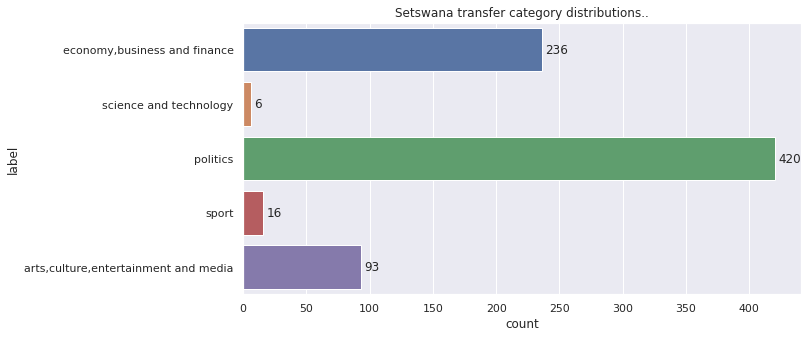

In [ ]:
# sns plot
sns.set(rc={"figure.figsize": (10,5)})
ax = sns.countplot(y="label",data=testdf_wcolNoHespace)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.set_title("Setswana transfer category distributions..")
    ax.text(x = width+3,
            y = p.get_y() + (height/2),
            s = "{:.0f}".format(width),
            va = "center")
plt.savefig('Class_dist_Setswana.png', format='eps', bbox_inches='tight')

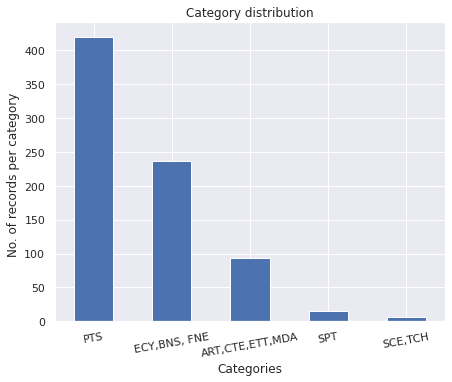

In [ ]:

# print("Number of rows per label:")
# print(testdf_wcolNoHespace['label'].value_counts())


plt.figure(figsize=(7, 5.5))
pd.value_counts(testdf_wcolNoHespace['label']).plot.bar(title="Category distribution")
plt.xlabel("Categories")
plt.ylabel("No. of records per category ")
plt.xticks(rotation = 15)
plt.xticks([0,1,2,3,4],['PTS', 'ECY,BNS, FNE', 'ART,CTE,ETT,MDA', 'SPT', 'SCE,TCH'])
plt.savefig("SSSClassdist75_space6h10dg.eps", format = 'eps', dpi= 300, bbox_inches = 'tight')
plt.show()

In [ ]:
# import numpy as np
from tensorflow.keras.utils import to_categorical
### Categorical data to be converted to numeric data
train_classes1 = copy_of_testdf_wcolNoHespace.label.tolist()

### Universal list of colors
total_cat1 =  copy_of_testdf_wcolNoHespace['label'].unique()

### map each color to an integer
mappings = {}
for x in range(len(total_cat1)):
  mappings[total_cat1[x]] = x

# integer representation
for x in range(len(train_classes1)):
  train_classes1[x] = mappings[train_classes1[x]]

testY = to_categorical(train_classes1)
# print(one_hot_encode[0:10])

In [ ]:
total_cat1

['economy,business and finance', 'science and technology', 'politics', 'sport', 'arts,culture,entertainment and media']
Categories (5, object): ['economy,business and finance', 'science and technology', 'politics', 'sport',
                         'arts,culture,entertainment and media']

In [ ]:


testY[0:10]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

# Zero shot transfer with VecMap 300D embeddings from  FastText and FastText monolinguals







In [ ]:
# # define cnn model
# def create_model():
#   model = Sequential()
#   int_sequences_input = keras.Input(shape=(300,), dtype="int64") # word embedding shape
#   embedding_sequence_file200d = embedding_layer_word_file200d(int_sequences_input)
#   x = SpatialDropout1D(0.2)(embedding_sequence_file200d)
#   # x = tf.keras.layers.SpatialDropout1D(
#   #     hp.Float('sdropout', 0.1, 0.5, step=0.1, default=0.1))(embedding_sequence_file200d)
#   x = Flatten()(x)
#   # hp_units1 = hp.Int('units1', 8, 16, step=2, default=4)
#   x = Dense(12, activation='relu')(x)
#   # x = Dense(units=hp_units1, activation='relu')(x)
#   x = Dropout(0.2)(x)
#   # x = Dropout(hp.Float('dropout',0.1,0.5,step=0.1,default=0.1))(x)
#   # compile model
#   outputs = Dense(5, activation='softmax')(x)
#   hp_learning_rate = 0.0001
#   opt = Adam(learning_rate=hp_learning_rate)
#   model = Model(int_sequences_input, outputs)
#   model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#   return model

# # Create a basic model instance
# model = create_model()

# # Display the model's architecture
# model.summary()

In [ ]:
model.load_weights('/content/drive/MyDrive/CrosslingualModels/Paper2Results/vecmap/')

In [ ]:
model.layers[1].get_weights()

[array([[ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00],
        [ 1.68370e-02,  3.28957e-03,  3.17510e-03, ...,  1.54585e-04,
         -1.94005e-04,  2.60140e-04],
        ...,
        [ 4.17018e-03,  1.37255e-03, -1.78185e-03, ..., -3.11701e-04,
          1.22136e-05,  1.96875e-04],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00]], dtype=float32)]

In [ ]:
vectorisesepedi = TextVectorization(max_tokens=20000, output_sequence_length=300)
# text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorisesepedi.adapt(copy_of_testdf_wcolNoHespace['content'].to_numpy())

In [ ]:
voca = vectorisesepedi.get_vocabulary()
word_index1 = dict(zip(voca, range(len(voca))))

In [ ]:
vectorisesepedi.get_vocabulary()[0: 5]

['', '[UNK]', 'a', 'go', 'ba']

In [ ]:
output = vectorisesepedi([" ke motho wa kgale"])
output.numpy()[0 ,:6]

array([  20,  145,   17, 3432,    0,    0])

In [ ]:
embeddings_index2 = {}
p_to_embedings = '/content/drive/MyDrive/CrosslingualModels/Paper2Embeddings/vecmap_fast_fast300d/'
with open(p_to_embedings) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index2[word] = coefs

print("Found %s word vectors." % len(embeddings_index2))

In [ ]:
# embeddings_index2

In [ ]:
num_tokens = len(voca) + 2
embedding_dim2 = 300
hits = 0
misses = 0
input_size = 300
# Prepare embedding matrix
embedding_matrix2 = np.zeros((num_tokens, embedding_dim2))
for word, i in word_index1.items():
    embedding_vector = embeddings_index2.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix2[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 0 words (16379 misses)


In [ ]:
embedding_matrix2.shape

(16381, 300)

In [ ]:

embedding_matrix2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
testX = vectorisesepedi(np.array([[s] for s in copy_of_testdf_wcolNoHespace.content.tolist()])).numpy()

In [ ]:
# copy_CrosslingualModel_200D.layers[1] 22085

In [ ]:
pad_matrix = np.zeros((5704, embedding_dim2))

In [ ]:

copy_embedding_matrix2 = embedding_matrix2

In [ ]:
padded_embedding_matrix2 = np.concatenate((embedding_matrix2, pad_matrix), axis=0)

In [ ]:

padded_embedding_matrix2.shape

(22085, 300)

In [ ]:
padded_embedding_matrix2[0: 100]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.013312  ,  0.062594  , -0.10439   , ...,  0.035482  ,
        -0.14941999,  0.0062979 ],
       [ 0.031485  , -0.014091  , -0.1066    , ..., -0.017418  ,
        -0.14128999, -0.10362   ],
       [-0.038919  ,  0.072349  , -0.15973   , ..., -0.013566  ,
        -0.071441  ,  0.0023622 ]])

In [ ]:
# Replace the embedding layer with embeddings of Sepedi data
model.layers[1].set_weights([padded_embedding_matrix2])

In [ ]:
model.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]

In [ ]:
# evaluate model and get accuracy with Trainable embeddings
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 30.350


**Results 300d embeddings**


# get confusion matrix

In [ ]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, classes_names)

In [ ]:
merge = testY.argmax(axis=1)

In [ ]:
from tensorflow.python.ops.math_ops import argmax
figsize = (12,12)
plot_confusion_matrix(estimator=classifier, X=testX, y_true=merge, cmap='Blues', normalize='true', ax=plt.subplots(figsize=figsize)[1])
plt.savefig("con-mat300gf.png", format = 'png', dpi= 150, bbox_inches = 'tight')

# Zero shot Testing with VecMap embedding of dimension 300 from glove and fast

In [ ]:
# define cnn model
def create_model():
  model = Sequential()
  int_sequences_input = keras.Input(shape=(300,), dtype="int64") # word embedding shape
  embedding_sequence_file200d = embedding_layer_word11d(int_sequences_input)
  x = SpatialDropout1D(0.1)(embedding_sequence_file200d)
  x = Flatten()(x)
  # hp_units1 = hp.Int('units1', 8, 16, step=2, default=4)
  x = Dense(16, activation='relu')(x)
  # x = Dense(units=hp_units1, activation='relu')(x)
  x = Dropout(0.5)(x)
  # x = Dropout(hp.Float('dropout',0.1,0.5,step=0.1,default=0.1))(x)
  # compile model
  outputs = Dense(5, activation='softmax')(x)
  hp_learning_rate = 0.0001
  opt = Adam(learning_rate=hp_learning_rate)
  model = Model(int_sequences_input, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 300)          6625500   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 300)         0         
 ropout1D)                                                       
                                                                 
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense (Dense)               (None, 16)                1440016   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                             

In [ ]:
model.load_weights('/content/drive/MyDrive/CrosslingualModels/Paper2Results/vecmap/')

In [ ]:
model.layers[1].get_weights()

[array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
          0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
          0.       ],
        [-0.03239  , -0.051933 , -0.077769 , ...,  0.051812 ,  0.029628 ,
         -0.055778 ],
        ...,
        [-0.078422 , -0.020805 , -0.062959 , ..., -0.0214   , -0.049392 ,
         -0.0034149],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
          0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
          0.       ]], dtype=float32)]

In [ ]:
# make copy
# copy_CrosslingualModel_200D = loaded_model_CrosslingualModel_200D

In [ ]:
vectorisesepedi = TextVectorization(max_tokens=20000, output_sequence_length=300)
# text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorisesepedi.adapt(copy_of_testdf_wcolNoHespace['content'].to_numpy())

In [ ]:
voca = vectorisesepedi.get_vocabulary()
word_index1 = dict(zip(voca, range(len(voca))))

In [ ]:
vectorisesepedi.get_vocabulary()[0: 5]

['', '[UNK]', 'a', 'go', 'ba']

In [ ]:
output = vectorisesepedi([" ke motho wa kgale"])
output.numpy()[0 ,:6]

array([  20,  145,   17, 3432,    0,    0])

In [ ]:
embeddings_index2 = {}
p_to_embedings = '/content/drive/MyDrive/CrosslingualModels/Paper2Embeddings/vecmap_glove_fast300/'
with open(p_to_embedings) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index2[word] = coefs

print("Found %s word vectors." % len(embeddings_index2))

Found 53532 word vectors.


In [ ]:
# embeddings_index2

In [ ]:
num_tokens = len(voca) + 2
embedding_dim2 = 300
hits = 0
misses = 0
input_size = 300
# Prepare embedding matrix
embedding_matrix2 = np.zeros((num_tokens, embedding_dim2))
for word, i in word_index1.items():
    embedding_vector = embeddings_index2.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix2[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 8629 words (7750 misses)


In [ ]:
embedding_matrix2.shape

(16381, 300)

In [ ]:
embedding_matrix2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
testX = vectorisesepedi(np.array([[s] for s in copy_of_testdf_wcolNoHespace.content.tolist()])).numpy()

In [ ]:
# copy_CrosslingualModel_200D.layers[1] 22085

In [ ]:
pad_matrix = np.zeros((5704, embedding_dim2))

In [ ]:
copy_embedding_matrix2 = embedding_matrix2

In [ ]:

padded_embedding_matrix2 = np.concatenate((embedding_matrix2, pad_matrix), axis=0)

In [ ]:
padded_embedding_matrix2.shape

(22085, 300)

In [ ]:
padded_embedding_matrix2[0: 100]

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.0044273, -0.017517 , -0.04483  , ..., -0.013344 , -0.0043902,
         0.084146 ],
       [ 0.065326 , -0.042823 ,  0.032016 , ..., -0.065872 , -0.10014  ,
         0.069197 ],
       [ 0.030104 ,  0.010856 ,  0.061121 , ...,  0.083428 , -0.0085313,
         0.041784 ]])

In [ ]:
# Replace the embedding layer with embeddings of Sepedi data
model.layers[1].set_weights([padded_embedding_matrix2])

In [ ]:
model.layers[1].get_weights()

In [ ]:
# evaluate model and get accuracy with Trainable embeddings
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
preds = model.predict(testX)

In [ ]:
preds[1]

array([0.3239888 , 0.06279597, 0.26312524, 0.18353435, 0.16655563],
      dtype=float32)

In [ ]:
y_preds = np.argmax(preds, axis=-1)

In [ ]:
y_preds[1]

0

In [ ]:
y_true = np.argmax(testY, axis=-1)

In [ ]:
# preds[0]
testY[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_true[0]

0

In [ ]:
f1_score(y_true, y_preds, average=None)

array([0.27027027, 0.        , 0.69357798, 0.        , 0.        ])

In [ ]:
f1_score(y_true, y_preds, average='macro')

0.1927696503843293

In [ ]:
f1_score(y_true, y_preds, average='micro')

0.5486381322957199

In [ ]:
f1_score(y_true, y_preds, average='weighted')

0.4605532244842565

# Confusion mstrix plot here

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# y_pred=model.predict(testX)

In [ ]:
testY.shape

In [ ]:
y_pred.shape

In [ ]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, classes_names)

In [ ]:
pred = classifier.predict

In [ ]:
merge = testY.argmax(axis=1)

In [ ]:
from tensorflow.python.ops.math_ops import argmax
figsize = (12,12)
plot_confusion_matrix(estimator=classifier, X=testX, y_true=merge, cmap='Blues', normalize='true', ax=plt.subplots(figsize=figsize)[1])
plt.savefig("con-mat300gf.png", format = 'png', dpi= 150, bbox_inches = 'tight')

# Zero short Transfer with VecMap embeddings of dimention 200 from Glove and fastText embeddings

In [ ]:
# define cnn model
def create_model():
  model = Sequential()
  int_sequences_input = keras.Input(shape=(200,), dtype="int64") # word embedding shape
  embedding_sequence_file111d = embedding_layer_word(int_sequences_input)
  x = SpatialDropout1D(0.2)(embedding_sequence_file111d)
  x = Flatten()(x)
  # hp_units1 = hp.Int('units1', 8, 16, step=2, default=4)
  x = Dense(14, activation='relu')(x)
  # x = Dense(units=hp_units1, activation='relu')(x)
  x = Dropout(0.1)(x)
  # x = Dropout(hp.Float('dropout',0.1,0.5,step=0.1,default=0.1))(x)
  # compile model
  outputs = Dense(5, activation='softmax')(x)
  hp_learning_rate = 0.00030201655847076974
  opt = Adam(learning_rate=hp_learning_rate)
  model = Model(int_sequences_input, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

In [ ]:
model.load_weights('/content/drive/MyDrive/CrosslingualModels/Paper2Results/vecmap/')

In [ ]:
model.layers[1].get_weights()

In [ ]:
vectorisesepedi = TextVectorization(max_tokens=20000, output_sequence_length=200)
# text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorisesepedi.adapt(copy_of_testdf_wcolNoHespace['content'].to_numpy())

In [ ]:
voca = vectorisesepedi.get_vocabulary()
word_index1 = dict(zip(voca, range(len(voca))))

In [ ]:
vectorisesepedi.get_vocabulary()[0: 5]

['', '[UNK]', 'a', 'go', 'ba']

In [ ]:
output = vectorisesepedi([" ke motho wa kgale"])
output.numpy()[0 ,:6]

array([  20,  145,   17, 3432,    0,    0])

In [ ]:
embeddings_index2 = {}
p_to_embedings = '/content/drive/MyDrive/CrosslingualModelPaper2/Paper2Embeddings/VecMap_glove_fast_200d_UCEC/trg_G_F_uns_sl_n_UCEC.txt'
with open(p_to_embedings) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index2[word] = coefs

print("Found %s word vectors." % len(embeddings_index2))

Found 53533 word vectors.


In [ ]:
num_tokens = len(voca) + 2
embedding_dim2 = 200
hits = 0
misses = 0
input_size = 200
# Prepare embedding matrix
embedding_matrix2 = np.zeros((num_tokens, embedding_dim2))
for word, i in word_index1.items():
    embedding_vector = embeddings_index2.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix2[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 8629 words (7750 misses)


In [ ]:
embedding_matrix2.shape

(16381, 200)

In [ ]:
embedding_matrix2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
testX = vectorisesepedi(np.array([[s] for s in copy_of_testdf_wcolNoHespace.content.tolist()])).numpy()

In [ ]:
# copy_CrosslingualModel_200D.layers[1] 22085

In [ ]:

pad_matrix = np.zeros((5704, embedding_dim2))

In [ ]:

copy_embedding_matrix2 = embedding_matrix2

In [ ]:
padded_embedding_matrix2 = np.concatenate((embedding_matrix2, pad_matrix), axis=0)

In [ ]:
padded_embedding_matrix2.shape

(22085, 200)

In [ ]:
padded_embedding_matrix2[0: 100]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-3.19151004e-04, -7.29169988e-04,  2.51924997e-04, ...,
        -6.03223016e-05, -2.22312992e-05,  2.84096996e-06],
       [-4.88537014e-04, -9.58098972e-04,  1.26913004e-03, ...,
        -2.00551003e-05, -4.19185999e-05, -1.37813004e-05],
       [-5.20092028e-04, -1.11186004e-03,  9.88858985e-04, ...,
        -2.60409997e-05, -1.61811004e-05, -2.46402997e-05]])

In [ ]:
# Replace the embedding layer with embeddings of Sepedi data
model.layers[1].set_weights([padded_embedding_matrix2])

In [ ]:
model.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]

In [ ]:
# evaluate model and get accuracy with Trainable embeddings
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 0.778


In [ ]:
# evaluate model and get accuracy with Trainable embeddings
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 12.062


In [ ]:
# evaluate model and get accuracy with Trainable embeddings
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 54.475


In [ ]:
54.475

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# y_pred=model.predict(testX)

In [ ]:
testY.shape

(771, 5)

In [ ]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, classes_names)

In [ ]:
pred = classifier.predict

In [ ]:
merge = testY.argmax(axis=1)

In [ ]:
# gertting old results

In [ ]:
from tensorflow.python.ops.math_ops import argmax
figsize = (12,12)
plot_confusion_matrix(estimator=classifier, X=testX, y_true=merge, cmap='Blues', normalize='true', ax=plt.subplots(figsize=figsize)[1])
plt.xticks([0,1,2,3,4],sorter)
plt.savefig("con-mat300gf.png", format = 'png', dpi= 150, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


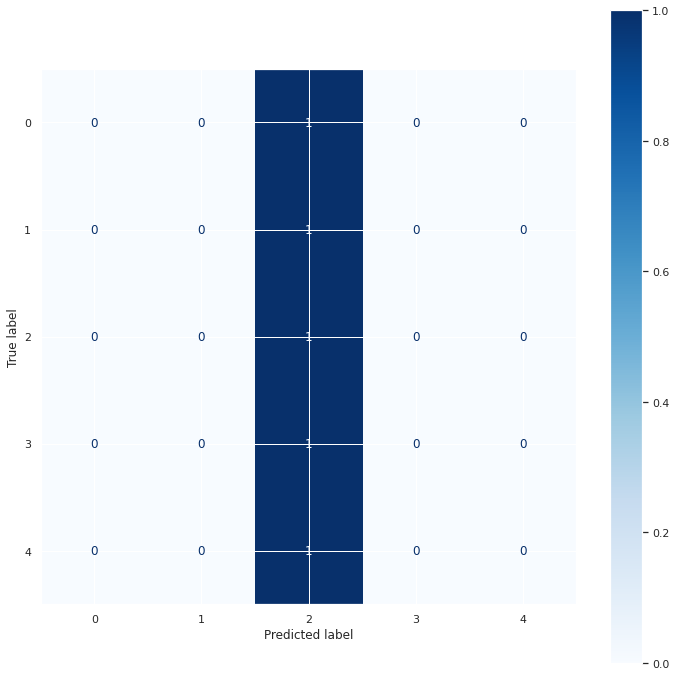

In [ ]:
from tensorflow.python.ops.math_ops import argmax
figsize = (12,12)
plot_confusion_matrix(estimator=classifier, X=testX, y_true=merge, cmap='Blues', normalize='true', ax=plt.subplots(figsize=figsize)[1])
plt.savefig("con-mat300gf.png", format = 'png', dpi= 150, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


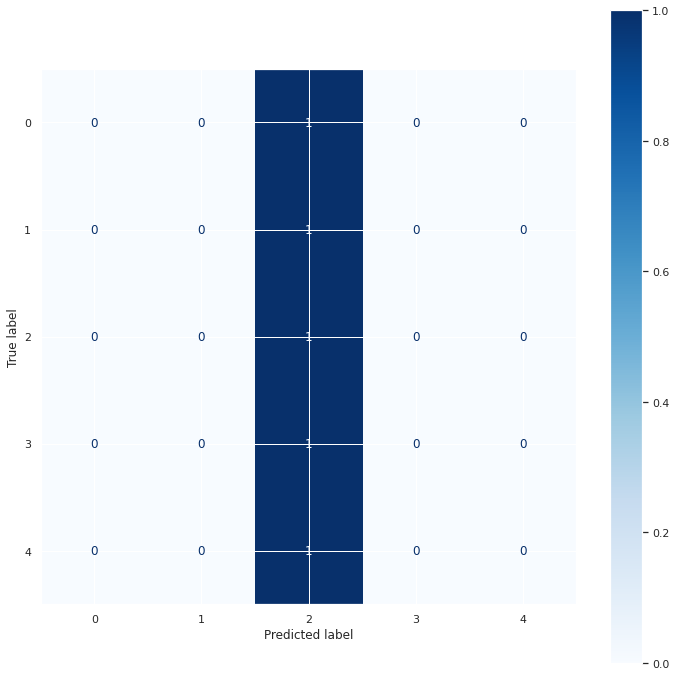

In [ ]:
from tensorflow.python.ops.math_ops import argmax
figsize = (12,12)
plot_confusion_matrix(estimator=classifier, X=testX, y_true=merge, cmap='Blues', normalize='true', ax=plt.subplots(figsize=figsize)[1])
plt.savefig("con-mat300gf.png", format = 'png', dpi= 150, bbox_inches = 'tight')

#  Results goes here

54.475

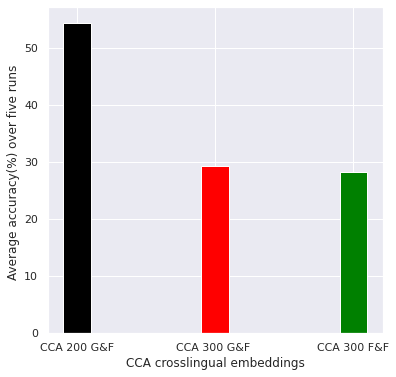

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
height = [54.50, 29.31, 28.25]
bars = ('CCA 200 G&F', 'CCA 300 G&F ', 'CCA 300 F&F')
x_pos = np.arange(len(bars))
plt.figure(figsize=(6, 6))
# Create bars with different colors
plt.bar(x_pos, height, width = 0.2, color=['black', 'red', 'green'])

# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.xlabel("CCA crosslingual embeddings")
plt.ylabel("Average accuracy(%) over five runs ")
plt.savefig("CCA_acc.png", format = 'png', dpi= 150, bbox_inches = 'tight')
# Show graph
plt.show()

In [ ]:
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

In [ ]:
# train with mapped embeddings
history = model.fit(x_trainvec, y_train, batch_size=BATCH_SIZE, epochs= num_epochs,
                    validation_data=(x_valvec, y_test),verbose=1, callbacks=[ReduceLROnPlateau])

In [ ]:
# Parama
LR = 1e-3
BATCH_SIZE = 64
num_epochs = 125

In [ ]:

# model = Sequential()
# embedding_layer = Embedding( num_tokens,
#                 embedding_dim,
#            embeddings_initializer=keras.initializers.Constant(embedding_matrix),
#              trainable=False,)
# model.add(embedding_layer)
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(5,activation='softmax'))
# model.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.summary()

In [ ]:

# sequence_input = Input(shape=(input_size,), dtype='int32') - character embedding
int_sequences_input = keras.Input(shape=(200,), dtype="int64") # word embedding shape
embedding_sequences = embedding_layer_word(int_sequences_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
# x = Conv1D(64, 5, activation='relu')(x)
# x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Flatten()(x)

x = Dense(16, activation='relu')(x)
x = Dropout(0.4)(x)
# x = Dense(8, activation='relu')(x)
# x = Dropout(0.3)(x)
outputs = Dense(5, activation='softmax')(x)
model = Model(int_sequences_input, outputs)
model.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
### Categorical data to be converted to numeric data
train_classes = df.Category.tolist()

### Universal list of colors
total_cat =  df['Category'].unique()

### map each color to an integer
mapping = {}
for x in range(len(total_cat)):
  mapping[total_cat[x]] = x

# integer representation
for x in range(len(train_classes)):
  train_classes[x] = mapping[train_classes[x]]

one_hot_encode = to_categorical(train_classes)
# print(one_hot_encode[0:10])

In [ ]:
np.random.seed(42)
shuffle_indices = np.random.permutation(np.arange(len(one_hot_encode)))
x_shuffled = df['Text'][shuffle_indices]
y_shuffled = one_hot_encode[shuffle_indices]

# Split train and test
training_rate = 0.8
train_len = int(len(one_hot_encode) * training_rate)

# train data
x_train = x_shuffled[:train_len]
y_train = y_shuffled[:train_len]

# test data
x_test = x_shuffled[train_len:]
y_test = y_shuffled[train_len:]

In [ ]:
# y_train

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
x_trainvec = vectorizer(np.array([[s] for s in x_train])).numpy()
x_valvec = vectorizer(np.array([[s] for s in x_test])).numpy()


In [ ]:
x_trainvec.shape

In [ ]:
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
# train with mapped embeddings
history = model.fit(x_trainvec, y_train, batch_size=BATCH_SIZE, epochs= num_epochs,
                    validation_data=(x_valvec, y_test),verbose=1, callbacks=[ReduceLROnPlateau])

In [ ]:
# 125 epochs, 16 neurons, 1 layer, 0.4 dropout
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# 125 epochs, 16 neurons, 1 layer, 0.4 dropout
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('CrosslingualModel.h5')

In [ ]:
path_totest = ''
testdata = pd.read_csv(path_totest, sep =",")

In [ ]:
testdata.Text = testdata.Text.apply(lambda x: preprocess(x))
testdata['cleantext'] = testdata['Text'].map(lambda x: cleanString(x))

In [ ]:
from tensorflow.keras.utils import to_categorical
### Categorical data to be converted to numeric data
train_classesEng = testdata.Category.tolist()

### Universal list of colors
total_catEng =  testdata['Category'].unique()

### map each color to an integer
mappingEng = {}
for x in range(len(total_catEng)):
  mappingEng[total_catEng[x]] = x

# integer representation
for x in range(len(train_classesEng)):
  train_classesEng[x] = mappingEng[train_classesEng[x]]

y_testEng = to_categorical(train_classesEng)

In [ ]:
x_testvecEng = vectorizer(np.array([[s] for s in testdata.cleantext.to_list()])).numpy()

In [ ]:
testresult = model.evaluate(x_testvecEng, y_testEng)
print('The test loss is ', testresult[0] )
print('The test accuracy is ', testresult[1])

In [ ]:
# model.layers

In [ ]:
# sepedi data

In [ ]:
testdf = pd.read_excel('/content/drive/MyDrive/Sotho_DAT/daily-news-full-latest.xlsx')

In [ ]:
testdf.head()

In [ ]:
testdf_wcols = testdf.drop(['Unnamed: 0', 'title', 'url', 'content_word_count', 'content_character_count', 'sub-label' ], axis=1)

In [ ]:
testdf_wcols

In [ ]:
# drop Nan
testdf_wcolsNanRemoved = testdf_wcols.dropna()

In [ ]:
testdf_wcolsNanRemoved.head()

In [ ]:
labelsavailable = testdf_wcolsNanRemoved['label'].unique()

In [ ]:
labelsavailable

['business', 'tech', 'politics', 'sport', 'entertainment'] -- Classes


, 'health', 'environment', 'labour', 'crime,law and justuce', 'religion and belief','human interest', 'disaster,accident and emergency incident', 'weather', 'lifestyle and leisure','health ', 'puso'

In [ ]:
testdf_wcolNoedu = testdf_wcolsNanRemoved[testdf_wcolsNanRemoved['label'] != 'education']


In [ ]:
testdf_wcolNohelt = testdf_wcolNoedu[testdf_wcolNoedu['label'] != 'health']

In [ ]:
testdf_wcolNoenv= testdf_wcolNohelt[testdf_wcolNohelt['label'] != 'environment']

In [ ]:
testdf_wcolNolab = testdf_wcolNoenv[testdf_wcolNoenv['label'] != 'labour']

In [ ]:
testdf_wcolNocljus = testdf_wcolNolab[testdf_wcolNolab['label'] != 'crime,law and justuce']

In [ ]:
testdf_wcolNorb = testdf_wcolNocljus[testdf_wcolNocljus['label'] != 'religion and belief']

In [ ]:
testdf_wcolNohi = testdf_wcolNorb[testdf_wcolNorb['label'] != 'human interest']

In [ ]:
testdf_wcolNodaei = testdf_wcolNohi[testdf_wcolNohi['label'] != 'disaster,accident and emergency incident']

In [ ]:
testdf_wcolNow = testdf_wcolNodaei[testdf_wcolNodaei['label'] != 'weather']

In [ ]:
testdf_wcolNoll = testdf_wcolNow[testdf_wcolNow['label'] != 'lifestyle and leisure']

In [ ]:
testdf_wcolNoll = testdf_wcolNow[testdf_wcolNow['label'] != 'puso']

In [ ]:
testdf_wcolNoHe = testdf_wcolNoll[testdf_wcolNoll['label'] != 'health']

In [ ]:
testdf_wcolNoSNTinc = testdf_wcolNoHe[testdf_wcolNoHe['label'] != 'sceince and technology']

In [ ]:
testdf_wcolNoSNTinc = testdf_wcolNoSNTinc[testdf_wcolNoSNTinc['label'] != 'sceince and technology']

In [ ]:
testdf_wcolNosoc = testdf_wcolNoSNTinc[testdf_wcolNoSNTinc['label'] != 'society']

In [ ]:
testdf_wcolNopuso = testdf_wcolNosoc[testdf_wcolNosoc['label'] != 'puso']

In [ ]:
testdf_wcolNopuso

In [ ]:
print("Number of rows per label:")
print(testdf_wcolNosoc['label'].value_counts())


plt.figure()
pd.value_counts(testdf_wcolNosoc['label']).plot.bar(title="Category distribution")
plt.xlabel("Categories")
plt.ylabel("No. of rows ")
plt.savefig("Sclasses.png", format = 'png', dpi = 150, bbox_inches='tight')
plt.show()

In [ ]:
# import numpy as np
from tensorflow.keras.utils import to_categorical
### Categorical data to be converted to numeric data
train_classes1 = testdf_wcolNopuso.label.tolist()

### Universal list of colors
total_cat1 =  testdf_wcolNopuso['label'].unique()

### map each color to an integer
mappings = {}
for x in range(len(total_cat1)):
  mappings[total_cat1[x]] = x

# integer representation
for x in range(len(train_classes)):
  train_classes1[x] = mappings[train_classes1[x]]

y_test = to_categorical(train_classes1)
# print(one_hot_encode[0:10])

In [ ]:
vectorisesepedi = TextVectorization(max_tokens=20000, output_sequence_length=200)
# text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorisesepedi.adapt(testdf_wcolNopuso['content'].to_numpy())

In [ ]:
voca = vectorisesepedi.get_vocabulary()
word_index = dict(zip(voca, range(len(voca))))

In [ ]:
embeddings_index2 = {}
path_to_file1 = '/content/drive/MyDrive/CrosslingualModel/mapped_trg.txt'
with open(path_to_file1) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index2[word] = coefs

print("Found %s word vectors." % len(embeddings_index2))

In [ ]:
num_tokens = len(voc) + 2
embedding_dim2 = 200
hits = 0
misses = 0
input_size = 300
# Prepare embedding matrix
embedding_matrix2 = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index2.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix2[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

In [ ]:
embedding_matrix2[0]

In [ ]:
model.layers[1].set_weights([embedding_matrix2])

In [ ]:
model.layers[1].get_weights()

In [ ]:
# Replace the embedding layer with matrix of Sepedi data


# model.layers[0].set_weights(embedding_matrix2)

** Zero Shot **


In [ ]:
x_zeroshort = vectorisesepedi(np.array([[s] for s in testdf_wcolNopuso.content.tolist()])).numpy()
y_pred = model.predict(x_zeroshort)

In [ ]:
# 125 epochs, 16 neurons, 1 layer, 0.4 dropout
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
history = model.fit(x_trainvec, y_train, batch_size=BATCH_SIZE, epochs= num_epochs,
                    validation_data=(x_valvec, y_test),verbose=1, callbacks=[ReduceLROnPlateau])


In [ ]:
history

In [ ]:

from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()